In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt #
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds2


In [2]:
time = ds.variables['time']

times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
#times

times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
#times2

times3 = ds["time"].dt.strftime("%Y%m%d")
#times3

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp
#lon

In [4]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-6

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)

#print(lev[low_ylim_idx])
#print(lev[high_ylim_idx])

y_lims = [lev[low_ylim_idx], lev[high_ylim_idx]]


In [5]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

In [6]:
geopH = ds2t.variables['Z3'] / 1000 #m-> km

In [7]:
Zavg = geopH.mean(('time','lat', 'lon'))

In [8]:
Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

In [9]:
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

In [ ]:
edens = ( elect * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

In [ ]:
M_vert = Mtdens.mean(('lat', 'lon')) / 1000

#M_vert #lev: 126 time: 672

In [ ]:
#__Mvert__
ticks = np.linspace(0, 22, num=23) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2, lev, M_vert, 
                levels=ticks,
                #locator=ticker.LogLocator(),
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 
ax.set_xlabel('Time / days')

ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
ax.set_xticklabels(np.linspace(1,29,10, dtype=int))

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12) #,format='%.0e'
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+': Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname=str(Metal)+': Time vs Height (Avg Lon & Lat)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [ ]:
#__Mvert_24h__
timeticks = np.linspace( (0) , (24) ,25, dtype=int)

ticks2 = np.linspace(0, 5.5, num=23) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2[0:25], lev, M_vert[:,0:25], 
                levels=ticks2,
                #locator=ticker.LogLocator(),
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 
ax.set_xlabel('Time / hrs')

#ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
#ax.set_xticklabels(np.linspace(1,29,10, dtype=int))
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+': Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname=str(Metal)+': Time vs Height (Avg Lon & Lat)'+'_24h.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [18]:
M_latlev = Mtdens.mean(('time', 'lon')) / 1000

/tmp/ipykernel_1980440/1451544115.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12)


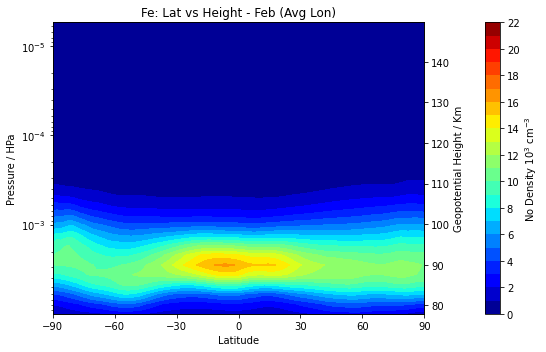

In [19]:
#__M_latlev__
#ticks = np.linspace(0, 18, num=19) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, M_latlev, 
                levels=ticks,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+': Lat vs Height - Feb (Avg Lon)')
plt.tight_layout()

figname=str(Metal)+': Lat vs Height - Feb (Avg Lon)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [20]:
M_lonlev = Mtdens.mean(('time', 'lat')) / 1000

/tmp/ipykernel_1980440/3308996732.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12)


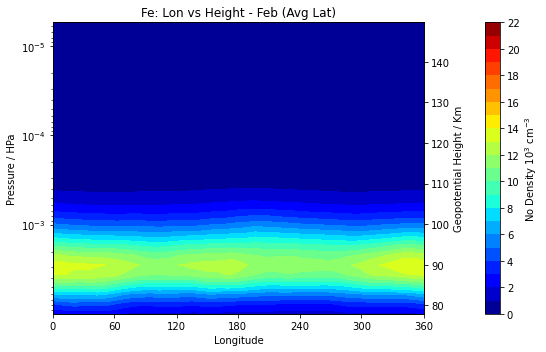

In [21]:
#__M_lonlev__
#ticks = np.linspace(0, 16, num=17) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lon, lev, M_lonlev, 
                levels=ticks,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Longitude')
ax.set_xticks(np.linspace(0,357.5,7, dtype=int)) 
ax.set_xticklabels(np.linspace(0,360,7, dtype=int))

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+': Lon vs Height - Feb (Avg Lat)')
plt.tight_layout()

figname=str(Metal)+': Lon vs Height - Feb (Avg Lat)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [30]:
Mp_vert = Mptdens.mean(('lat', 'lon')) / 1000

/tmp/ipykernel_1980440/3519503076.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)


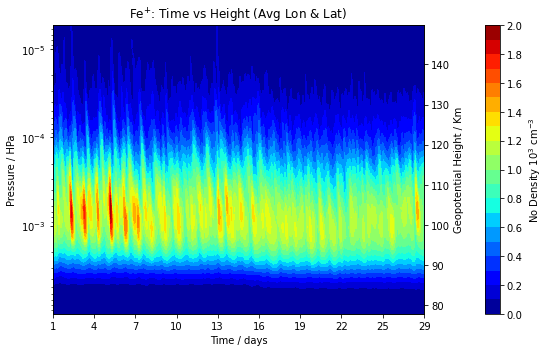

In [31]:
#__Mp_vert__
ticks2 = np.linspace(0, 2.0, num=21) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2, lev, Mp_vert, 
                levels=ticks2, 
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Time / days')
ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
ax.set_xticklabels(np.linspace(1,29,10, dtype=int))

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname=str(Metal)+'p: Time vs Height (Avg Lon & Lat)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

/tmp/ipykernel_1980440/666385485.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.12)


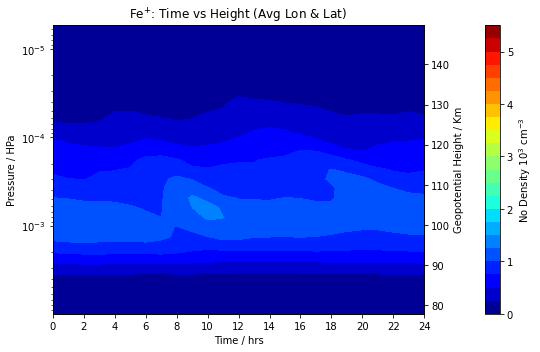

In [36]:
#__Mvert_24h__
timeticks = np.linspace( (0) , (24) ,25, dtype=int)

ticks2 = np.linspace(0, 5.5, num=23) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2[0:25], lev, Mp_vert[:,0:25], 
                levels=ticks2,
                #locator=ticker.LogLocator(),
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 
ax.set_xlabel('Time / hrs')

#ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
#ax.set_xticklabels(np.linspace(1,29,10, dtype=int))
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname=str(Metal)+'p: Time vs Height (Avg Lon & Lat)'+'_24h.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [24]:
Mp_latlev = Mptdens.mean(('time', 'lon')) / 1000

/tmp/ipykernel_1980440/953045816.py:20: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)


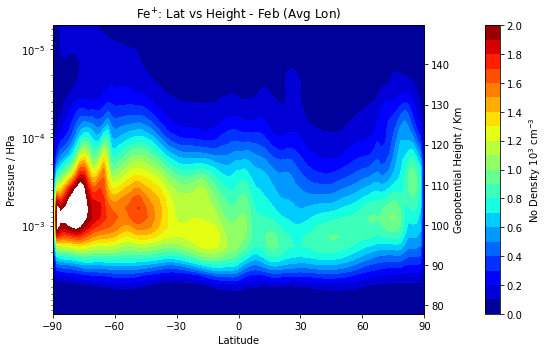

In [25]:
#__Mp_latlev__
#ticks2 = np.linspace(0, 2.5, num=26) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, Mp_latlev, 
                levels=ticks2,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Lat vs Height - Feb (Avg Lon)')
plt.tight_layout()

figname=str(Metal)+'p: Lat vs Height - Feb (Avg Lon)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [26]:
Mp_lonlev = Mptdens.mean(('time', 'lat')) / 1000

/tmp/ipykernel_1980440/328155248.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)


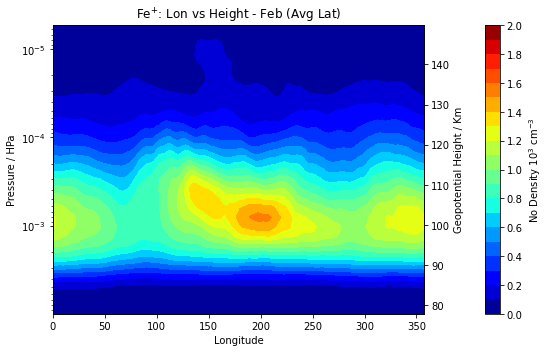

In [27]:
#__Mp_lonlev__
#ticks2 = np.linspace(0, 1.6, num=17) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lon, lev, Mp_lonlev, 
                levels=ticks2,  
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Longitude')
#ax.set_xticks(np.linspace(0,144,13,dtype=int))
#ax.set_xticklabels(np.linspace(1,144,12, dtype=int))

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::2], pad=0.12)
cbar.set_label(r'No Density 10$^{3}$ cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Lon vs Height - Feb (Avg Lat)')
plt.tight_layout()

figname=str(Metal)+'p: Lon vs Height - Feb (Avg Lat)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

In [61]:
e_vert = edens.mean(('lat', 'lon')) / 1e3

/tmp/ipykernel_1980440/4064697707.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.12)


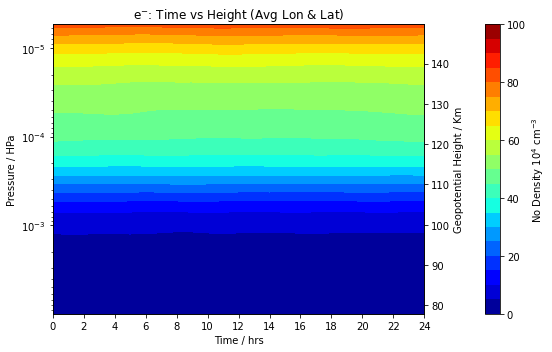

In [62]:
#__evert_24h__
timeticks = np.linspace( (0) , (24) ,25, dtype=int)

ticks2 = np.linspace(0, 100, num=21) #cm-3

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(times2[0:25], lev, e_vert[:,0:25], 
                levels=ticks2,
                #locator=ticker.LogLocator(),
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 
ax.set_xlabel('Time / hrs')

#ax.set_xticks(np.linspace(0,672,10, dtype=int)) 
#ax.set_xticklabels(np.linspace(1,29,10, dtype=int))
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks2[::4], pad=0.12)
cbar.set_label(r'No Density 10$^{4}$ cm$^{-3}$')

plt.title('e$^{-}$: Time vs Height (Avg Lon & Lat)')
plt.tight_layout()

figname='e: Time vs Height (Avg Lon & Lat)'+'_24h.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)